In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [25]:
# read json file as pandas dataframe
data = pd.read_json("../data/trades.json")
data.set_index('timestamp', inplace=True)
data["costs"] = data["price"] * data["quantity"]

In [26]:
data.tail()

,buyer,seller,symbol,currency,price,quantity,costs
timestamp,,,,,,,
99500,SUBMISSION,,AMETHYSTS,SEASHELLS,9998,3,29994
99600,,,STARFRUIT,SEASHELLS,5056,12,60672
99700,,,AMETHYSTS,SEASHELLS,9995,2,19990
99700,,,STARFRUIT,SEASHELLS,5050,2,10100
99900,SUBMISSION,,STARFRUIT,SEASHELLS,5051,1,5051


In [27]:
# get all trades we sold
amethysts = data[data['symbol'] == 'AMETHYSTS']
starfruit = data[data['symbol'] == 'STARFRUIT']
sold_AMETHYSTS = amethysts[amethysts['seller'] == 'SUBMISSION']
bought_AMETHYSTS = amethysts[amethysts['buyer'] == 'SUBMISSION']
sold_STARFRUIT = starfruit[starfruit['seller'] == 'SUBMISSION']
bought_STARFRUIT = starfruit[starfruit['buyer'] == 'SUBMISSION']

In [28]:
print("Amethysts:")
print(f"# Bought: {bought_AMETHYSTS['quantity'].sum()} for a price of average {bought_AMETHYSTS['price'].mean()}. Total Costs: {bought_AMETHYSTS['costs'].sum()}")
print(f"# Bought Price Range: {bought_AMETHYSTS['price'].min()} - {bought_AMETHYSTS['price'].max()}")
print(f"# Sold: {sold_AMETHYSTS['quantity'].sum()} for a price of average {sold_AMETHYSTS['price'].mean()}. Total Costs: {sold_AMETHYSTS['costs'].sum()}")
print(f"# Sold Price Range: {sold_AMETHYSTS['price'].min()} - {sold_AMETHYSTS['price'].max()}")
amethysts_quantity = bought_AMETHYSTS['quantity'].sum() - sold_AMETHYSTS['quantity'].sum()
amethysts_profit = sold_AMETHYSTS['costs'].sum() - bought_AMETHYSTS['costs'].sum()
amethysts_mid_price = 10001.0
amethysts_profit += (amethysts_quantity * amethysts_mid_price)
print(f"# End day with quantity: {amethysts_quantity}. Need to sell/buy for {amethysts_mid_price}")
print(f"# Profit of {amethysts_profit}")

print("STARFRUIT:")
print(f"# Bought: {bought_STARFRUIT['quantity'].sum()} for a price of average {bought_STARFRUIT['price'].mean()}. Total Costs: {bought_STARFRUIT['costs'].sum()}")
print(f"# Bought Price Range: {bought_STARFRUIT['price'].min()} - {bought_STARFRUIT['price'].max()}")
print(f"# Sold: {sold_STARFRUIT['quantity'].sum()} for a price of average {sold_STARFRUIT['price'].mean()}. Total Costs: {sold_STARFRUIT['costs'].sum()}")
print(f"# Sold Price Range: {sold_STARFRUIT['price'].min()} - {sold_STARFRUIT['price'].max()}")
startfruit_quantity = bought_STARFRUIT['quantity'].sum() - sold_STARFRUIT['quantity'].sum()
startfuit_profit = sold_STARFRUIT['costs'].sum() - bought_STARFRUIT['costs'].sum()
startfruit_mid_price = 5050.5
startfuit_profit += (startfruit_quantity * startfruit_mid_price)
print(f"# End day with quantity: {startfruit_quantity}. Need to sell/buy for {startfruit_mid_price}")
print(f"# Profit of {startfuit_profit}")

print(f"Total Profit: {amethysts_profit + startfuit_profit}")

Amethysts:
# Bought: 217 for a price of average 9998.04938271605. Total Costs: 2169576
# Bought Price Range: 9998 - 10000
# Sold: 197 for a price of average 10001.978723404256. Total Costs: 1970386
# Sold Price Range: 10000 - 10002
# End day with quantity: 20. Need to sell/buy for 10001.0
# Profit of 830.0
STARFRUIT:
# Bought: 131 for a price of average 5039.8. Total Costs: 660269
# Bought Price Range: 5029 - 5057
# Sold: 146 for a price of average 5044.0921052631575. Total Costs: 736555
# Sold Price Range: 5032 - 5062
# End day with quantity: -15. Need to sell/buy for 5050.5
# Profit of 528.5
Total Profit: 1358.5


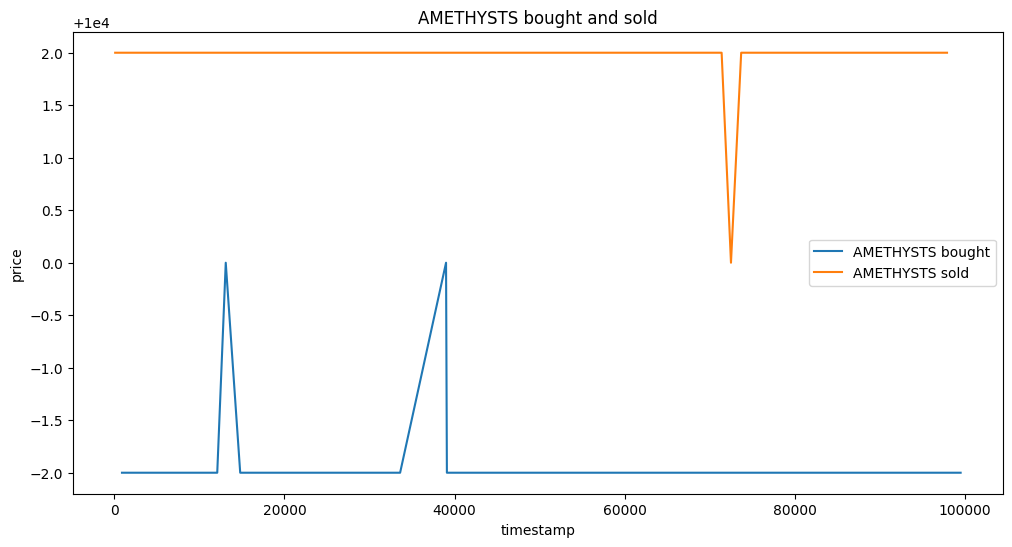

In [29]:
# draw a plot of the price by timestamp for amethysts bought and sold
plt.figure(figsize=(12, 6))
plt.plot(bought_AMETHYSTS.index, bought_AMETHYSTS['price'], label='AMETHYSTS bought')
plt.plot(sold_AMETHYSTS.index, sold_AMETHYSTS['price'], label='AMETHYSTS sold')
plt.legend()
plt.title('AMETHYSTS bought and sold')
plt.xlabel('timestamp')
plt.ylabel('price')
plt.show()


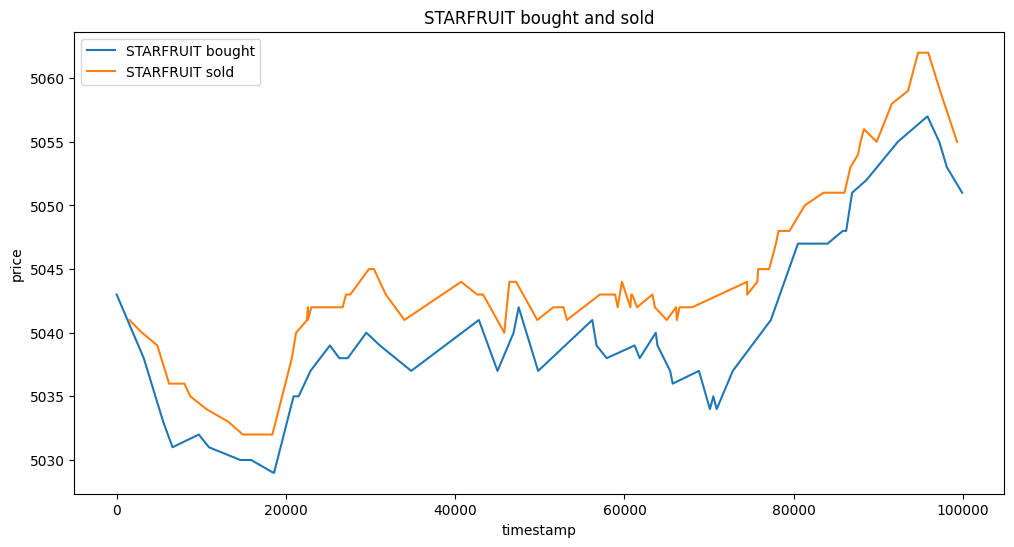

In [30]:
# same for starfruit
plt.figure(figsize=(12, 6))
plt.plot(bought_STARFRUIT.index, bought_STARFRUIT['price'], label='STARFRUIT bought')
plt.plot(sold_STARFRUIT.index, sold_STARFRUIT['price'], label='STARFRUIT sold')
plt.legend()
plt.title('STARFRUIT bought and sold')
plt.xlabel('timestamp')
plt.ylabel('price')
plt.show()
